In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Preprocessing
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# tree
# ==============================================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

# PCA
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


In [70]:
#@title Load datasets
print("loading data...")
basics = pd.read_csv('E:/examen tecnico/title_basics.tsv', sep='\t' ,low_memory=False)
print("1/6 loaded...")
ratings = pd.read_csv('E:/examen tecnico/title_ratings.tsv', sep='\t' ,low_memory=False)
print("2/6 loaded...")
akas = pd.read_csv('E:/examen tecnico/title_akas.tsv', sep='\t' ,low_memory=False)
print("3/6 loaded...")
crew = pd.read_csv('E:/examen tecnico/title_crew.tsv', sep='\t' ,low_memory=False)
print("4/6 loaded...")
episode = pd.read_csv('E:/examen tecnico/title_episode.tsv', sep='\t' ,low_memory=False)
print("5/6 loaded...")
namesB = pd.read_csv('E:/examen tecnico/name_basics.tsv', sep='\t' ,low_memory=False)
print("ended loading data")


loading data...
1/6 loaded...
2/6 loaded...
3/6 loaded...
4/6 loaded...
5/6 loaded...
ended loading data


In [71]:
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10359893,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10359894,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10359895,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10359896,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [72]:
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,2007
1,tt0000002,5.8,270
2,tt0000003,6.5,1920
3,tt0000004,5.5,178
4,tt0000005,6.2,2696
...,...,...,...
1374989,tt9916730,7.6,11
1374990,tt9916766,7.0,22
1374991,tt9916778,7.2,36
1374992,tt9916840,8.8,6


In [73]:
akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
37940178,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
37940179,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
37940180,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
37940181,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [74]:
crew

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
10359893,tt9916848,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10359894,tt9916850,nm1485677,"nm9187127,nm1485677,nm9826385,nm1628284"
10359895,tt9916852,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10359896,tt9916856,nm10538645,nm6951431


In [75]:
episode

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
...,...,...,...,...
7907675,tt9916846,tt1289683,3,18
7907676,tt9916848,tt1289683,3,17
7907677,tt9916850,tt1289683,3,19
7907678,tt9916852,tt1289683,3,20


In [76]:
namesB

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0072308,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0038355,tt0037382,tt0075213"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0049189,tt0054452,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0078723,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0069467,tt0083922"
...,...,...,...,...,...,...
13054197,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt11657662,tt14069590"
13054198,nm9993716,Essias Loberg,\N,\N,NaN,\N
13054199,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
13054200,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744


In [77]:
# The only 2 important datasets are title basics and title rankings so we're going to merge them using the "nconst"

df = pd.merge(basics, ratings, on='tconst', how='inner')
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2007
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,270
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1920
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.5,178
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2696
...,...,...,...,...,...,...,...,...,...,...,...
1374989,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama,7.6,11
1374990,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Game-Show,Reality-TV",7.0,22
1374991,tt9916778,tvEpisode,Escape,Escape,0,2019,\N,\N,"Crime,Drama,Mystery",7.2,36
1374992,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,\N,11,"Adventure,Animation,Comedy",8.8,6


In [78]:
#the dataset has object variables so we're going to see the different objects on the rows:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374994 entries, 0 to 1374993
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1374994 non-null  object 
 1   titleType       1374994 non-null  object 
 2   primaryTitle    1374994 non-null  object 
 3   originalTitle   1374994 non-null  object 
 4   isAdult         1374994 non-null  object 
 5   startYear       1374994 non-null  object 
 6   endYear         1374994 non-null  object 
 7   runtimeMinutes  1374994 non-null  object 
 8   genres          1374991 non-null  object 
 9   averageRating   1374994 non-null  float64
 10  numVotes        1374994 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 115.4+ MB


In [79]:
objt_columns = ['titleType','isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres' ]

for col in objt_columns:
    print(f"-------------------------------------------")
    print(f"column {col}: {df[col].nunique()} sublevels")

-------------------------------------------
column titleType: 10 sublevels
-------------------------------------------
column isAdult: 5 sublevels
-------------------------------------------
column startYear: 145 sublevels
-------------------------------------------
column endYear: 84 sublevels
-------------------------------------------
column runtimeMinutes: 771 sublevels
-------------------------------------------
column genres: 2046 sublevels


In [80]:
#The column is adult is supposed to have only 1 and 0 so it's wrong
df = df[(df['isAdult'] == "0") | (df['isAdult'] == "1")]
print(df['isAdult'].unique())

['0' '1']


In [81]:
#In the title type should be only movie:
df = df[(df['titleType'] == "movie")]
print(df['titleType'].unique())

['movie']


In [82]:
#We don't need anymore the column title type since is only "movie"
df = df.drop('titleType', axis=1)
df

,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,208
144,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.3,485
333,tt0000502,Bohemios,Bohemios,0,1905,\N,100,\N,4.1,15
365,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,855
373,tt0000591,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.0,21
...,...,...,...,...,...,...,...,...,...,...
1374961,tt9916270,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1451
1374965,tt9916362,Coven,Akelarre,0,2020,\N,92,"Drama,History",6.4,5628
1374970,tt9916428,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",3.5,17
1374976,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,\N,123,Drama,8.6,7


In [83]:
#the runtime needs to be int64 and we clear the null data:
df = df[(df['runtimeMinutes'] != r"/N") & (df['runtimeMinutes'] != '\\N')]
df['runtimeMinutes'] = df['runtimeMinutes'].astype('int64')
print(df['runtimeMinutes'].nunique())


416


C:\Users\i_cri\AppData\Local\Temp\ipykernel_13932\2649374091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runtimeMinutes'] = df['runtimeMinutes'].astype('int64')


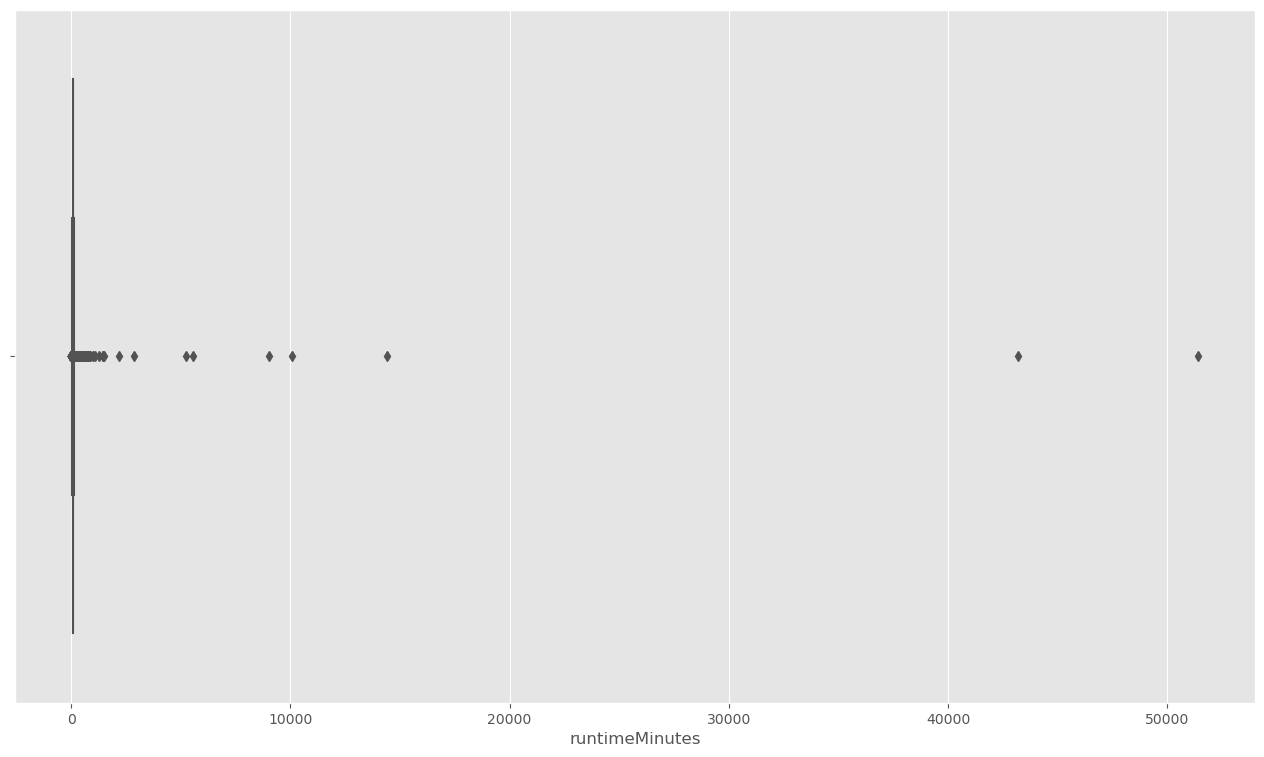

In [84]:
#We have outliers un the runtime minutes. 
sns.boxplot(x='runtimeMinutes', data=df)
#we filter it down of 200 minutes
df = df[(df['runtimeMinutes'] < 201) ]

<Axes: xlabel='runtimeMinutes'>

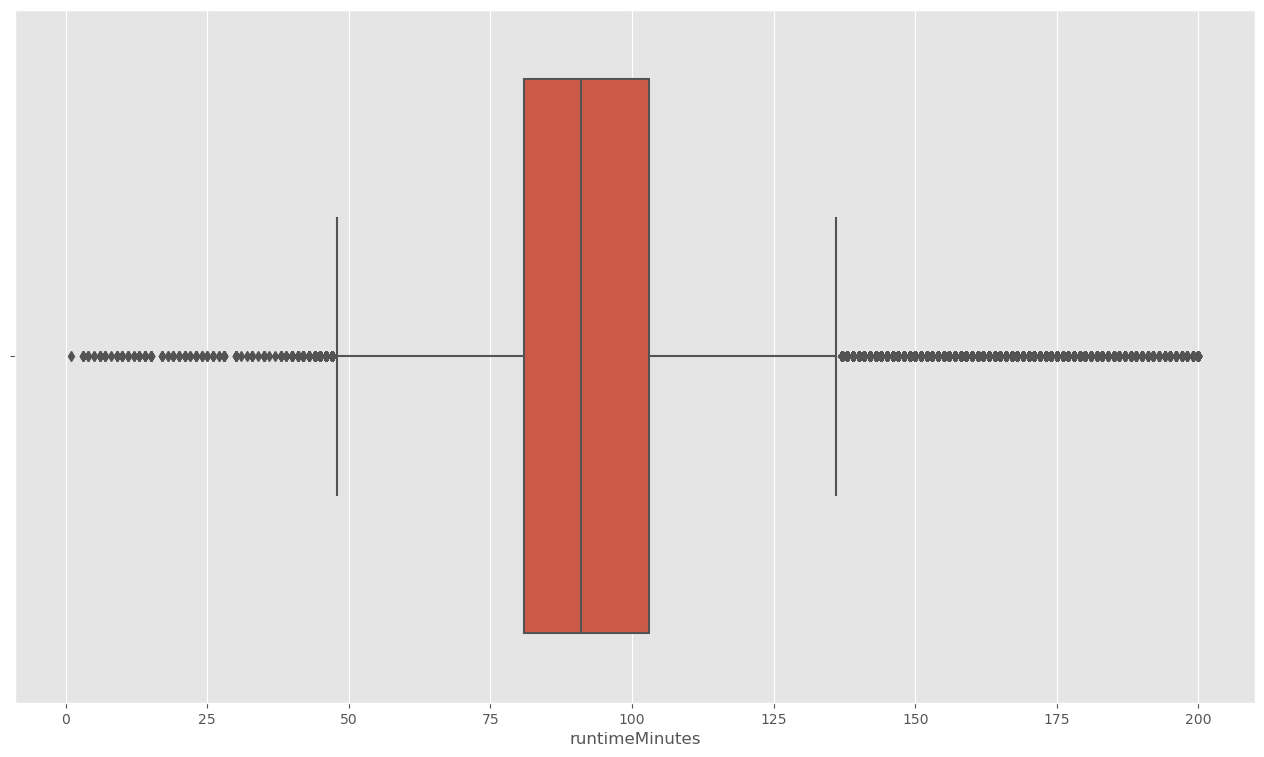

In [85]:
#Better but no perfect, the outliers are n<50 & n>130
df['runtimeMinutes'] = df['runtimeMinutes'].astype('int64')
sns.boxplot(x='runtimeMinutes', data=df)

<Axes: xlabel='runtimeMinutes'>

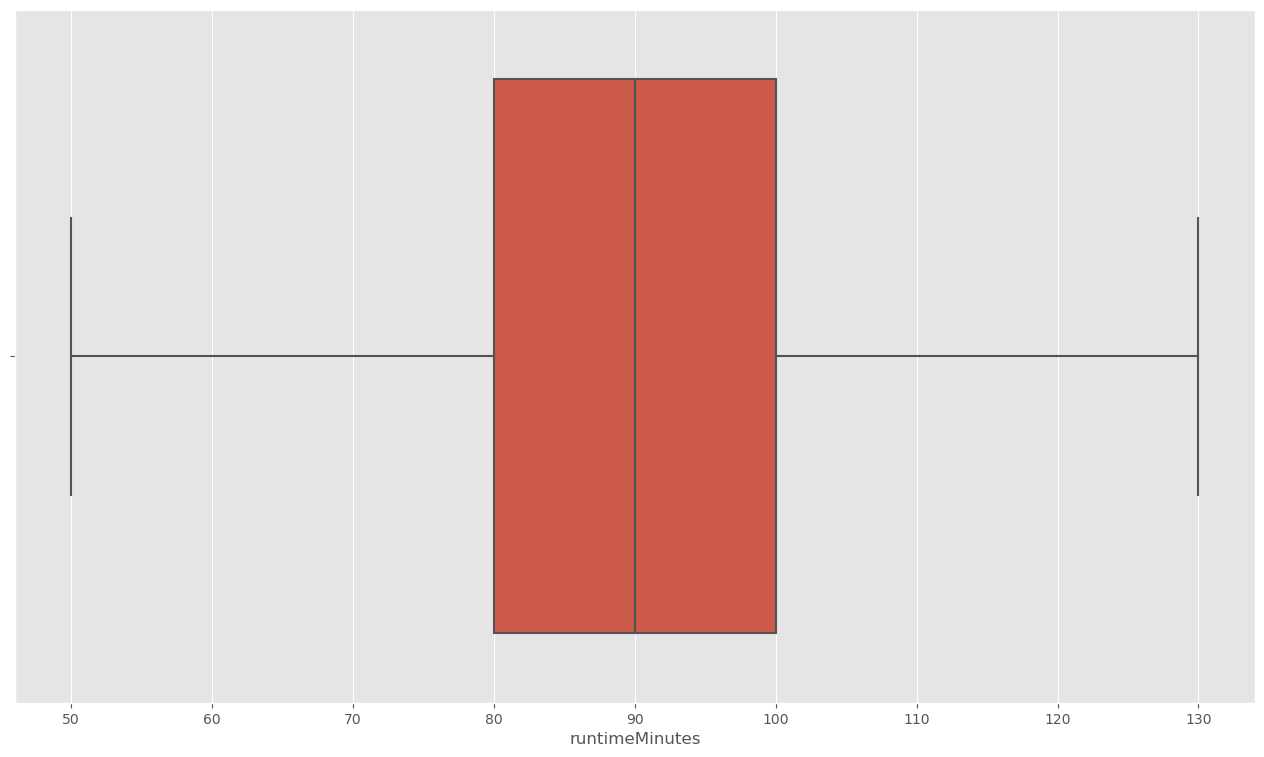

In [86]:
#perfect shape of data
df = df[(df['runtimeMinutes'] > 49) & (df['runtimeMinutes'] < 131) ]
df['runtimeMinutes'] = df['runtimeMinutes'].astype('int64')
sns.boxplot(x='runtimeMinutes', data=df)

In [87]:
df.describe()

,runtimeMinutes,averageRating,numVotes
count,249310.000000,249310.000000,2.493100e+05
mean,90.101408,6.124341,3.335041e+03
std,16.569486,1.335560,2.881405e+04
min,50.000000,1.000000,5.000000e+00
25%,80.000000,5.300000,2.200000e+01
50%,90.000000,6.200000,7.500000e+01
75%,100.000000,7.000000,3.680000e+02
max,130.000000,10.000000,1.752690e+06


In [88]:
#Check if there are duplicates:
print(f"before clearing duplicates: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"after clearing duplicates: {df.shape}")

before clearing duplicates: (249310, 10)
after clearing duplicates: (249310, 10)


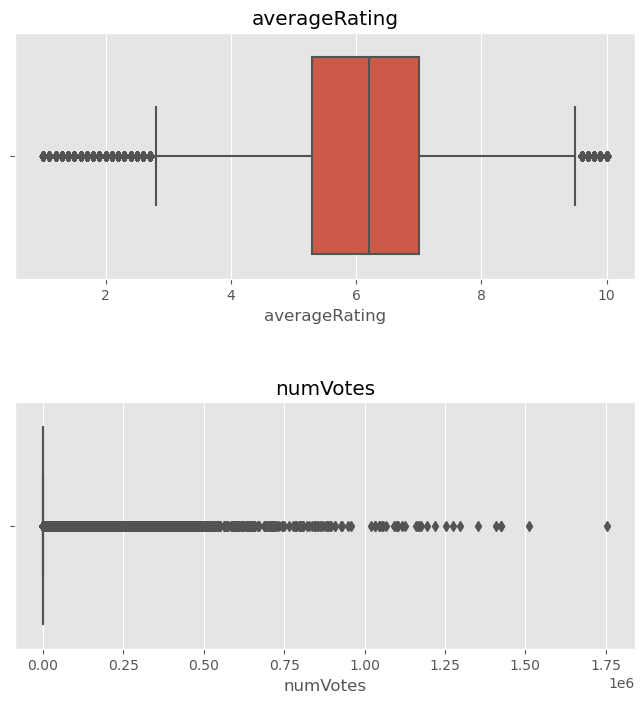

In [89]:
#search for outliers in the numerical variables:
num_columns = ['averageRating', 'numVotes']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(num_columns):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

<Axes: xlabel='averageRating'>

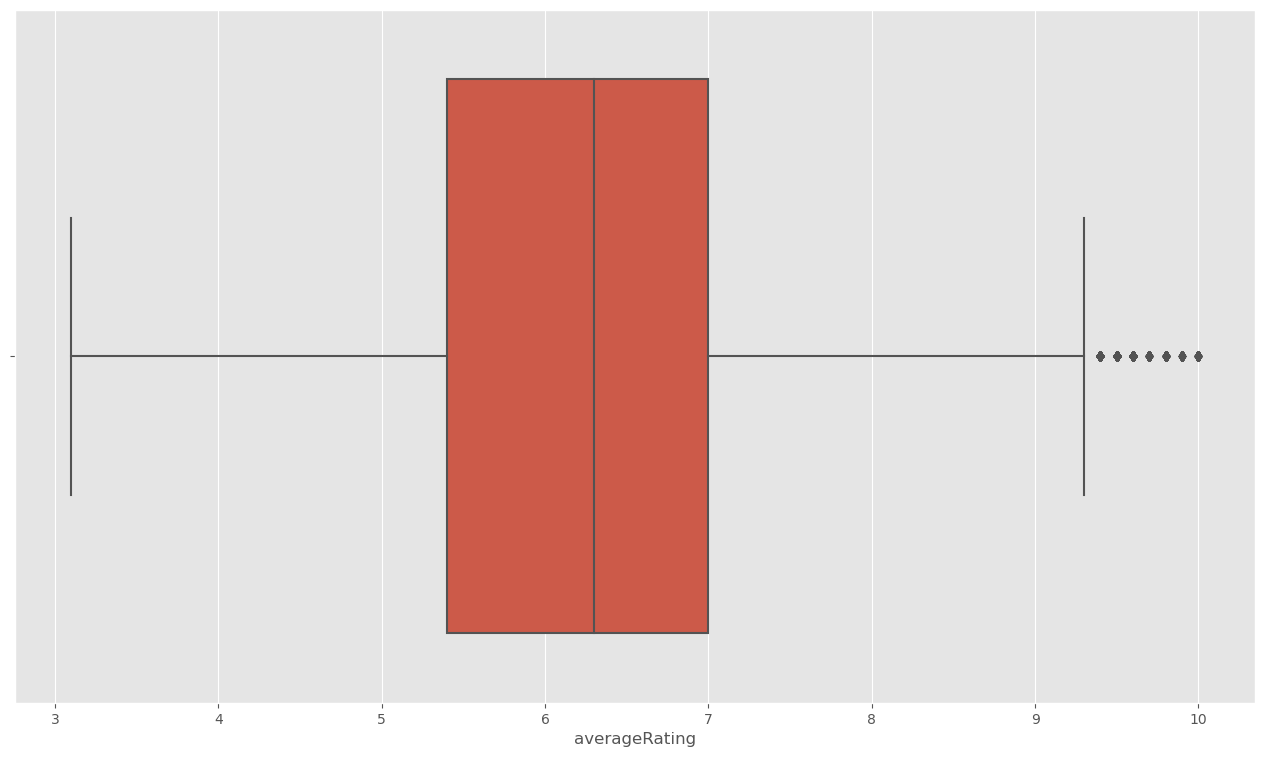

In [90]:
#We have some at rating and since we want to search for the best we leave only the upper part
df = df[(df['averageRating'] > 3.0)]
sns.boxplot(x='averageRating', data=df)

In [91]:
df.describe()

,runtimeMinutes,averageRating,numVotes
count,244217.000000,244217.000000,2.442170e+05
mean,90.169104,6.200198,3.386108e+03
std,16.596508,1.238852,2.910096e+04
min,50.000000,3.100000,5.000000e+00
25%,80.000000,5.400000,2.200000e+01
50%,90.000000,6.300000,7.400000e+01
75%,100.000000,7.000000,3.660000e+02
max,130.000000,10.000000,1.752690e+06


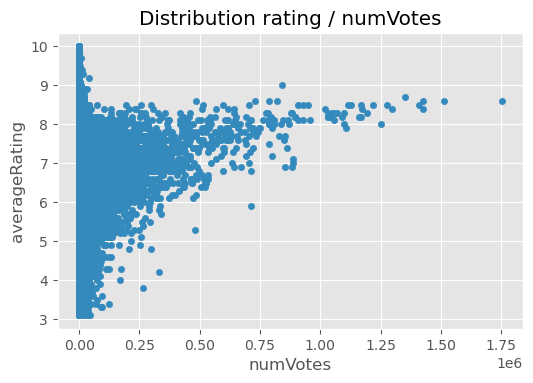

In [92]:
fig, ax = plt.subplots(figsize=(6, 3.84))

df.plot(
    x    = 'numVotes',
    y    = 'averageRating',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribution rating / numVotes');

In [93]:
corr_test = pearsonr(x = df['numVotes'], y =  df['averageRating'])
print(corr_test[0])
print("P-value: ", corr_test[1])

0.061126646230217345
P-value:  8.000358664429633e-201


In [94]:
X = df[['numVotes']]
y = df['averageRating']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [95]:
print("Intercept:", modelo.intercept_)
print("Coefficient:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Determination coefficient R^2:", modelo.score(X, y))

Intercept: [6.19246065]
Coefficient: [('numVotes', 2.596445843922128e-06)]
Determination coefficient R^2: 0.003735724265155449


C:\Users\i_cri\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [96]:
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"Root Mean Square Error: {rmse}")

[[6.19255153]
 [6.19252037]
 [6.19258268]]

Root Mean Square Error: 1.2345890747580688


In [97]:
########################################### PCA #######################################################

In [98]:
# PCA model training with data scaling
# ==============================================================================
tmp_df = df[['numVotes', 'averageRating', 'runtimeMinutes']].copy()

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(tmp_df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [99]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = tmp_df.columns,
    index   = ['PC1', 'PC2', 'PC3']
)


,numVotes,averageRating,runtimeMinutes
PC1,0.717420,0.310384,0.623675
PC2,0.039447,0.875724,-0.481198
PC3,0.695523,-0.369824,-0.616018


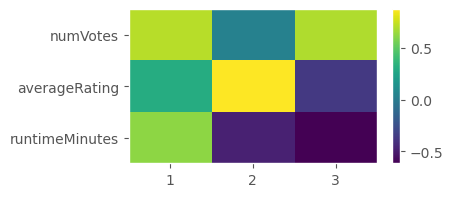

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(tmp_df.columns)), tmp_df.columns)
plt.xticks(range(len(tmp_df.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Percentage of variance explained for every component
----------------------------------------------------
[0.37419742 0.33595534 0.28984725]


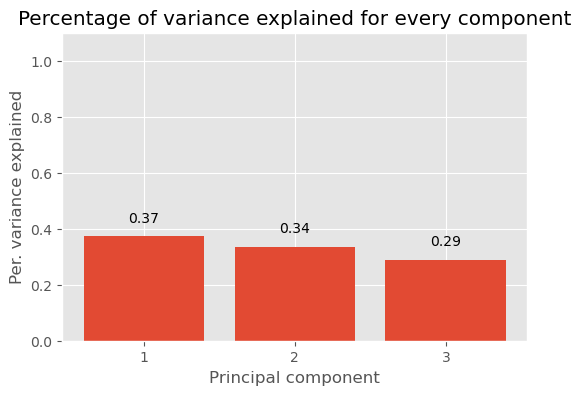

In [101]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Percentage of variance explained for every component')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(tmp_df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentage of variance explained for every component')
ax.set_xlabel('Principal component')
ax.set_ylabel('Per. variance explained');

------------------------------------------
Percentage of variance explained accumulated
------------------------------------------
[0.37419742 0.71015275 1.        ]


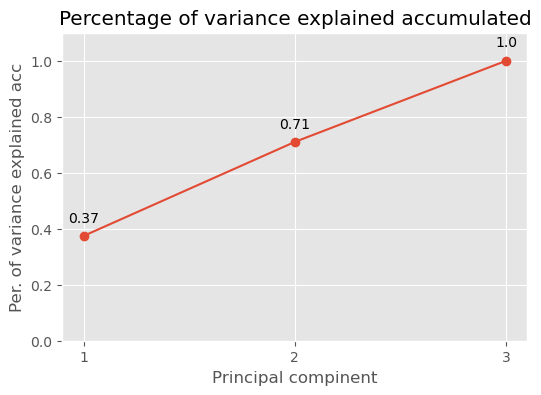

In [102]:
# Percentage of variance explained accumulated
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Percentage of variance explained accumulated')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(tmp_df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(tmp_df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Percentage of variance explained accumulated')
ax.set_xlabel('Principal compinent')
ax.set_ylabel('Per. of variance explained acc');